<a href="https://colab.research.google.com/github/91072puu/Clinical_Study_Project_R-Python/blob/main/notebooks/01_AE_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### R Setup

In [ ]:
#!pip install -q rpy2
#%load_ext rpy2.ipython

#test
#%%R
#x<- c(1,2,3)
#mean(x)

### Read data with Python

In [ ]:
#Data Upload
#from google.colab import files
#uploaded = files.upload()

### AE data analysis

In [30]:
#Read data
import pandas as pd

ae=pd.read_sas("ae.xpt", format="xport")
#ae.head()
#ae.describe()

dm=pd.read_sas("dm.xpt", format="xport")
#dm.head()
#dm.describe()

#Data merge
merged_ae = pd.merge(ae, dm, on="USUBJID", how="left")

#check
print(merged_ae.head())
print(merged_ae.shape)
merged_ae["USUBJID"].nunique()



         STUDYID_x DOMAIN_x         USUBJID  AESEQ  AESPID  \
0  b'CDISCPILOT01'    b'AE'  b'01-701-1015'    1.0  b'E07'   
1  b'CDISCPILOT01'    b'AE'  b'01-701-1015'    2.0  b'E08'   
2  b'CDISCPILOT01'    b'AE'  b'01-701-1015'    3.0  b'E06'   
3  b'CDISCPILOT01'    b'AE'  b'01-701-1023'    3.0  b'E10'   
4  b'CDISCPILOT01'    b'AE'  b'01-701-1023'    1.0  b'E08'   

                                    AETERM                        AELLT  \
0             b'APPLICATION SITE ERYTHEMA'  b'APPLICATION SITE REDNESS'   
1             b'APPLICATION SITE PRURITUS'  b'APPLICATION SITE ITCHING'   
2                             b'DIARRHOEA'                  b'DIARRHEA'   
3  b'ATRIOVENTRICULAR BLOCK SECOND DEGREE'    b'AV BLOCK SECOND DEGREE'   
4                              b'ERYTHEMA'                  b'ERYTHEMA'   

   AELLTCD                                  AEDECOD  AEPTCD  ...   SEX  \
0      NaN             b'APPLICATION SITE ERYTHEMA'     NaN  ...  b'F'   
1      NaN             b'APP

225

### Bar plot

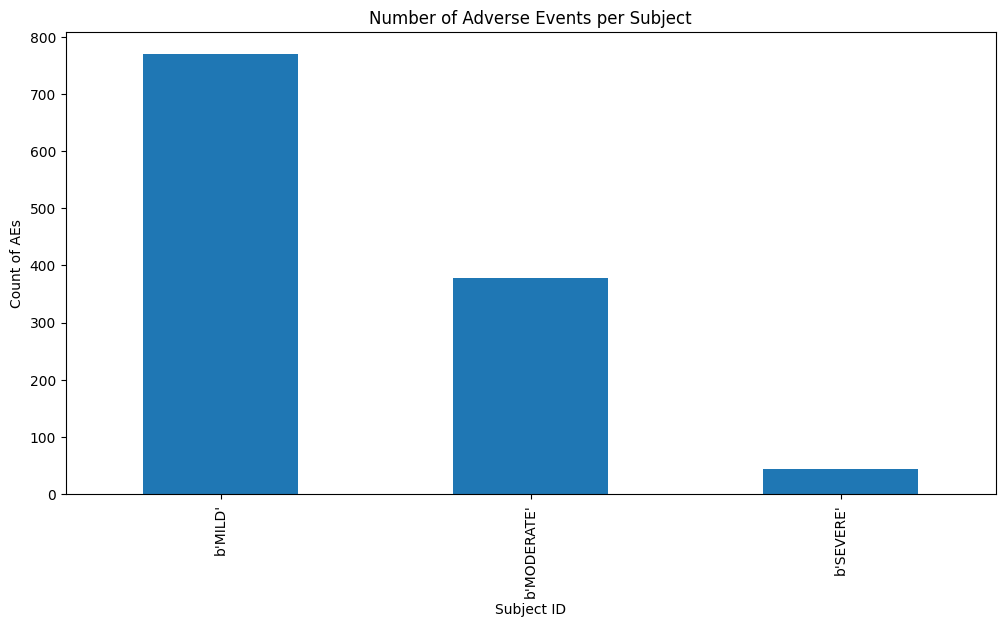

In [27]:
#Bar plot N of AE per subject
import matplotlib.pyplot as plt

ae_counts = merged_ae['AESEV'].value_counts()
ae_counts.plot(kind='bar', figsize=(12,6))
plt.title("Adverse Event Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


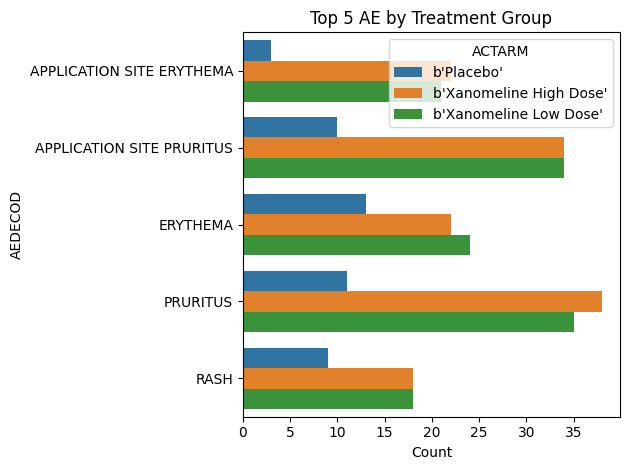

In [32]:
import seaborn as sns

#Top 5 AEs
top_ae = merged_ae['AEDECOD'].value_counts().nlargest(5).index
df_top = merged_ae[merged_ae['AEDECOD'].isin(top_ae)]

sns.countplot(data=df_top, y='AEDECOD', hue='ACTARM')
plt.title('Top 5 AE by Treatment Group')
plt.xlabel('Count')
plt.ylabel('AEDECOD')
plt.tight_layout()
plt.show()